In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix

In [ ]:
CAPACITY = 4500
VEHICLES = 3
STATIONS = 7
ENERGY_CAPACITY = 162
ENERGY_CONSUMPTION = 1.00

In [36]:
f_path = "./E-n30-k3-s7.evrp"
node_cords_start = False
customers_start = False
stations_start = False
node_coords = []
customers = []
stations = []


with open(f_path, "r") as file:
    for line in file:
        if line.strip() == "NODE_COORD_SECTION":
            node_cords_start = True
        
        if line.strip() == "DEMAND_SECTION":
            customers_start = True
            node_cords_start = False

        if line.strip() == "STATIONS_COORD_SECTION":
            customers_start = False
            stations_start = True

        if line.strip() == "DEPOT_SECTION":
            stations_start = False

        if node_cords_start:
            node_coords.append(line.strip())

        if customers_start:
            customers.append(line.strip())

        if stations_start:
            stations.append(line.strip())

        

In [37]:
node_coords.pop(0)
customers.pop(0)
stations.pop(0)

'STATIONS_COORD_SECTION'

In [50]:
all_nodes = []

for i in range(len(node_coords)):
    row = node_coords[i].split(" ")
    all_nodes.append([int(row[1]), int(row[2])])

all_nodes

[[266, 235],
 [295, 272],
 [301, 258],
 [309, 260],
 [217, 274],
 [218, 278],
 [282, 267],
 [242, 249],
 [230, 262],
 [249, 268],
 [256, 267],
 [265, 257],
 [267, 242],
 [259, 265],
 [315, 233],
 [329, 252],
 [318, 252],
 [329, 224],
 [267, 213],
 [275, 192],
 [303, 201],
 [208, 217],
 [326, 181],
 [228, 217],
 [233, 265],
 [270, 253],
 [284, 203],
 [313, 264],
 [314, 191]]

In [52]:
customers_np = []
for i, demand in enumerate(customers):
    row = demand.split(" ")
    customers_np.append([int(row[0]), int(row[1])])

customers_np 

[[1, 0],
 [2, 125],
 [3, 84],
 [4, 60],
 [5, 500],
 [6, 300],
 [7, 175],
 [8, 350],
 [9, 150],
 [10, 1100],
 [11, 4100],
 [12, 225],
 [13, 300],
 [14, 250],
 [15, 500],
 [16, 150],
 [17, 100],
 [18, 250],
 [19, 120],
 [20, 600],
 [21, 500],
 [22, 175],
 [23, 75]]

In [60]:
stations_np = [int(i) for i in stations]
stations_np

[24, 25, 26, 27, 28, 29, 30]

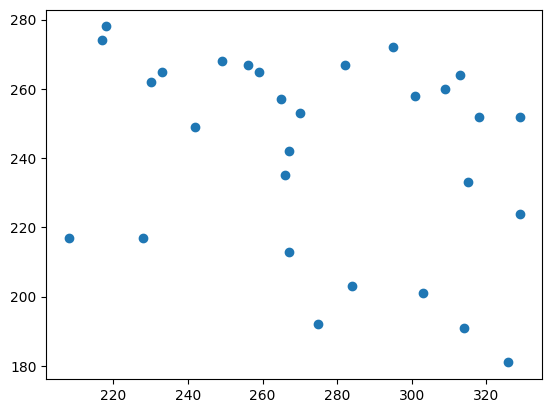

In [62]:

x = [coord[0] for coord in all_nodes]
y = [coord[1] for coord in all_nodes]

plt.scatter(x,y)
plt.show()

In [63]:
df = pd.DataFrame(all_nodes, columns=[all_nodes[0]])
Distance_Matrix = pd.DataFrame(distance_matrix(df.values, df.values))
Distance_Matrix

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.000000,47.010637,41.880783,49.739320,62.625873,64.443774,35.777088,27.784888,45.000000,37.121422,...,43.931765,50.249378,60.728906,80.721744,42.047592,44.598206,18.439089,36.715120,55.226805,65.115282
1,47.010637,0.000000,15.231546,18.439089,78.025637,77.233412,13.928388,57.775427,65.764732,46.173586,...,82.462113,71.449283,102.927159,96.135321,86.683332,62.393910,31.400637,69.871310,19.697716,83.198558
2,41.880783,15.231546,0.000000,8.246211,85.510233,85.375641,21.023796,59.682493,71.112587,52.952809,...,70.936591,57.035077,101.636608,80.956779,83.725743,68.359345,31.400637,57.567352,13.416408,68.249542
3,49.739320,18.439089,8.246211,0.000000,93.059121,92.763139,27.892651,67.896981,79.025312,60.530984,...,76.026311,59.304300,109.772492,80.808415,91.706052,76.164296,39.623226,62.241465,5.656854,69.180922
4,62.625873,78.025637,85.510233,93.059121,0.000000,4.123106,65.375837,35.355339,17.691806,32.557641,...,100.439036,112.805142,57.706152,143.282937,58.051701,18.357560,57.008771,97.621719,96.519428,127.663621
5,64.443774,77.233412,85.375641,92.763139,4.123106,0.000000,64.938432,37.643060,20.000000,32.572995,...,103.174609,114.690889,61.814238,145.165423,61.814238,19.849433,57.697487,99.904955,96.026038,129.556937
6,35.777088,13.928388,21.023796,27.892651,65.375837,64.938432,0.000000,43.863424,52.239832,33.015148,...,75.325958,69.260378,89.308454,96.602277,73.593478,49.040799,18.439089,64.031242,31.144823,82.462113
7,27.784888,57.775427,59.682493,67.896981,35.355339,37.643060,43.863424,0.000000,17.691806,20.248457,...,65.863495,77.620873,46.690470,108.074049,34.928498,18.357560,28.284271,62.289646,72.567210,92.455395
8,45.000000,65.764732,71.112587,79.025312,17.691806,20.000000,52.239832,17.691806,0.000000,19.924859,...,83.216585,95.131488,50.089919,125.606528,45.044423,4.242641,41.000000,79.981248,83.024093,109.986363
9,37.121422,46.173586,52.952809,60.530984,32.557641,32.572995,33.015148,20.248457,19.924859,0.000000,...,80.324343,86.052310,65.436993,116.180893,55.154329,16.278821,25.806976,73.824115,64.124878,100.767058


In [64]:
class Truck:
    def __init__(self):
        self.capacity = CAPACITY
        self.energy_capacity = ENERGY_CAPACITY
        self.route = []

    def add_destination(self, position):
        self.route.append(position)

    def decrease_energy(self, distance):
        self.energy_capacity -= distance

    def refill_energy(self):
        self.energy_capacity = ENERGY_CAPACITY

    def decrease_capacity(self, demand):
        self.capacity -= demand